# Extract [O I] and O I lines from PZ cube

## Library imports and data loading

Copied from the `02-01-Raman-Wings-IR-Source-C` notebook:

In [1]:
from pathlib import Path
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from mpdaf.obj import Cube
import regions
import sys
from whispy import moments
from whispy import extract

sns.set_context("talk")
sns.set_color_codes()

In [2]:
moments.FIGPATH = Path("../../figs")
moments.SAVEPATH = Path("../../data")

Note, that we only have the coadded version of the Peter cube, so the seeing is a bit worse than in the sharp ESO cube

In [3]:
datapath = Path("/Users/will/Work/Muse-Hii-Data/SMC-NGC-346/")
fitsfilepath = datapath / "PeterZeidler" / "DATACUBE_FINAL_fwhm_cor.fits"
cube = Cube(str(fitsfilepath))

## Use moments to extract the [O I] 6300 line

In [4]:
b1, b2 = 6265, 6275
r1, r2 = 6332, 6345
w1, w2 = 6298, 6308

oi6300cube = cube.select_lambda(b1 - 200, r1 + 200)

In [5]:
# Position of mYSO
x, y = 116, 147
# position of B0 star SSN 43
xb, yb = 95, 163
# position of B0 star SSN 40
xbb, ybb = 121, 133
m = 3

boxes = {
    "SSN 152+168": regions.BoundingBox(
        iymin=y - m,
        iymax=y + m,
        ixmin=x - m,
        ixmax=x + m,
    ),
    #    "BG 152+168": regions.BoundingBox(
    #        iymin=y-2*m, iymax=y+2*m, ixmin=x-2*m, ixmax=x+2*m,
    #    ),
    "SSN 43": regions.BoundingBox(
        iymin=yb - m,
        iymax=yb + m,
        ixmin=xb - m,
        ixmax=xb + m,
    ),
    #    "BG 43": regions.BoundingBox(
    #        iymin=yb-2*m, iymax=yb+2*m, ixmin=xb-2*m, ixmax=xb+2*m,
    #    ),
    "SSN 40": regions.BoundingBox(
        iymin=ybb - m,
        iymax=ybb + m,
        ixmin=xbb - m,
        ixmax=xbb + m,
    ),
    #    "BG 40": regions.BoundingBox(
    #        iymin=ybb-2*m, iymax=ybb+2*m, ixmin=xbb-2*m, ixmax=xbb+2*m,
    #    ),
    "blue": regions.BoundingBox(iymin=75, iymax=140, ixmin=15, ixmax=40),
    "red": regions.BoundingBox(iymin=200, iymax=250, ixmin=210, ixmax=300),
    "magenta": regions.BoundingBox(iymin=10, iymax=50, ixmin=100, ixmax=150),
    "green": regions.BoundingBox(iymin=10, iymax=100, ixmin=200, ixmax=300),
    "cyan": regions.BoundingBox(iymin=170, iymax=210, ixmin=90, ixmax=120),
}


In [6]:
wavranges = [
    (6000, 6100),
    (6150, 6195),
    (6205, 6250),
    (6330, 6345),
    (6400, 6450),
    (6480, 6490),
    (6520, 6530),
]

        Use get_overlap_slices instead. [warnings]
        Use get_overlap_slices instead. [warnings]
        Use get_overlap_slices instead. [warnings]
        Use get_overlap_slices instead. [warnings]
        Use get_overlap_slices instead. [warnings]
        Use get_overlap_slices instead. [warnings]
        Use get_overlap_slices instead. [warnings]
        Use get_overlap_slices instead. [warnings]


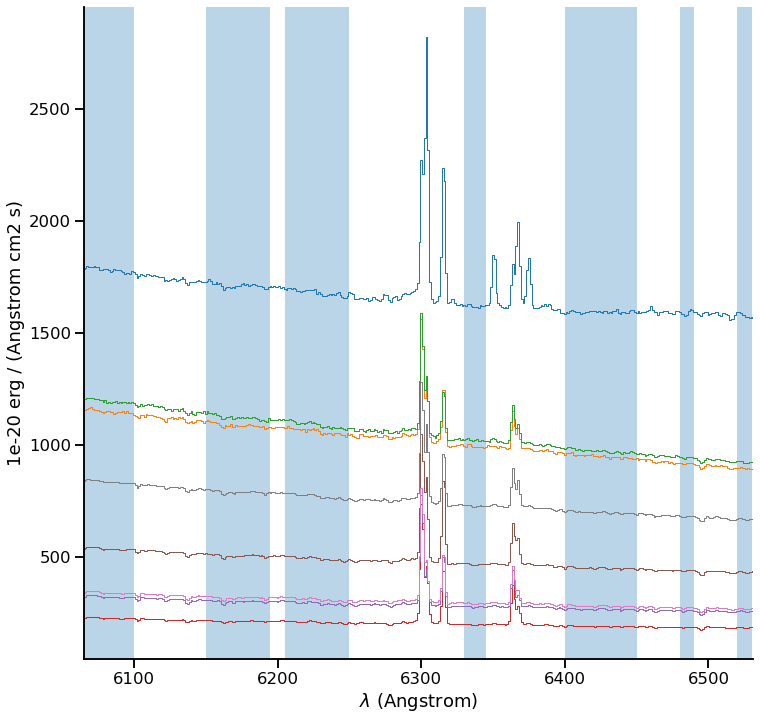

In [7]:
fig, ax = plt.subplots(figsize=(12, 12))
for box in boxes.values():
    yslice, xslice = box.slices
    spec = oi6300cube[:, yslice, xslice].mean(axis=(1, 2))
    spec.plot()

for wavrange in wavranges:
    ax.axvspan(*wavrange, alpha=0.3)
sns.despine()

In [8]:
yslice, xslice = boxes["SSN 152+168"].slices
subcube = oi6300cube[:, yslice, xslice]
contcube = extract.fit_continuum(
    subcube,
    wav_ranges=wavranges,
    deg=5,
    median=False,
)

extract.fit_continuum: row 0


        Use get_overlap_slices instead. [warnings]


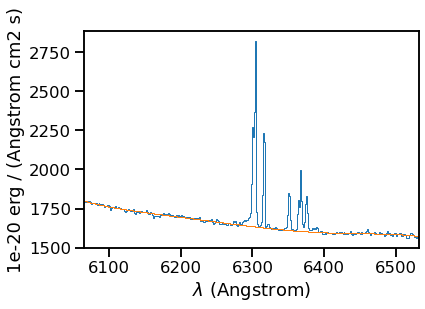

In [9]:
subcube.mean(axis=(1, 2)).plot()
contcube.mean(axis=(1, 2)).plot()

In [10]:
contcube = extract.fit_continuum(
    oi6300cube,
    wav_ranges=wavranges,
    deg=5,
    median=False,
)

extract.fit_continuum: row 0


/Users/will/miniconda3/envs/py39/lib/python3.9/site-packages/numpy/polynomial/chebyshev.py:1671: RankWarning: The fit may be poorly conditioned
  return pu._fit(chebvander, x, y, deg, rcond, full, w)
/Users/will/miniconda3/envs/py39/lib/python3.9/site-packages/numpy/polynomial/polyutils.py:299: RuntimeWarning: divide by zero encountered in double_scalars
  off = (old[1]*new[0] - old[0]*new[1])/oldlen
/Users/will/miniconda3/envs/py39/lib/python3.9/site-packages/numpy/polynomial/polyutils.py:300: RuntimeWarning: divide by zero encountered in true_divide
  scl = newlen/oldlen
/Users/will/miniconda3/envs/py39/lib/python3.9/site-packages/numpy/polynomial/polyutils.py:368: RuntimeWarning: invalid value encountered in add
  return off + scl*x


extract.fit_continuum: row 10
extract.fit_continuum: row 20
extract.fit_continuum: row 30
extract.fit_continuum: row 40
extract.fit_continuum: row 50
extract.fit_continuum: row 60
extract.fit_continuum: row 70
extract.fit_continuum: row 80
extract.fit_continuum: row 90
extract.fit_continuum: row 100
extract.fit_continuum: row 110
extract.fit_continuum: row 120
extract.fit_continuum: row 130
extract.fit_continuum: row 140
extract.fit_continuum: row 150
extract.fit_continuum: row 160
extract.fit_continuum: row 170
extract.fit_continuum: row 180
extract.fit_continuum: row 190
extract.fit_continuum: row 200
extract.fit_continuum: row 210
extract.fit_continuum: row 220
extract.fit_continuum: row 230
extract.fit_continuum: row 240
extract.fit_continuum: row 250
extract.fit_continuum: row 260
extract.fit_continuum: row 270
extract.fit_continuum: row 280
extract.fit_continuum: row 290
extract.fit_continuum: row 300
extract.fit_continuum: row 310
extract.fit_continuum: row 320


        Use get_overlap_slices instead. [warnings]
        Use get_overlap_slices instead. [warnings]
        Use get_overlap_slices instead. [warnings]
        Use get_overlap_slices instead. [warnings]
        Use get_overlap_slices instead. [warnings]
        Use get_overlap_slices instead. [warnings]
        Use get_overlap_slices instead. [warnings]
        Use get_overlap_slices instead. [warnings]


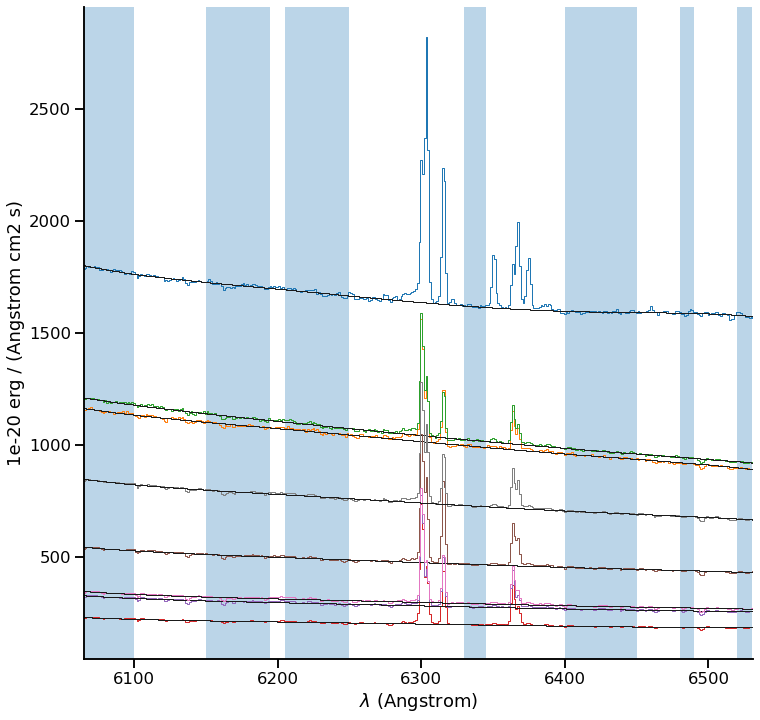

In [11]:
fig, ax = plt.subplots(figsize=(12, 12))
for box in boxes.values():
    yslice, xslice = box.slices
    spec = oi6300cube[:, yslice, xslice].mean(axis=(1, 2))
    cspec = contcube[:, yslice, xslice].mean(axis=(1, 2))
    spec.plot()
    cspec.plot(color="k")

for wavrange in wavranges:
    ax.axvspan(*wavrange, alpha=0.3)
sns.despine()

In [12]:
wavmin, wavmax = wavranges[0][0], wavranges[-1][1]
wavmin, wavmax

(6000, 6530)

In [13]:
prefix = f"../../big-data/ngc346-PZ-{wavmin:d}-{wavmax:d}-cube"
csubcube = oi6300cube - contcube
cdivcube = oi6300cube / contcube
csubcube.write(
    f"{prefix}-contsub.fits",
    savemask="nan",
)
cdivcube.write(
    f"{prefix}-contdiv.fits",
    savemask="nan",
)
contcube.write(
    f"{prefix}-cont.fits",
    savemask="nan",
)

/Users/will/miniconda3/envs/py39/lib/python3.9/site-packages/mpdaf/obj/arithmetic.py:124: RuntimeWarning: invalid value encountered in true_divide
  var /= (b_data ** 4)


In [14]:
w1, w2

(6298, 6308)

In [15]:
mom6300 = moments.find_moments(csubcube.select_lambda(6300, 6308))

/Users/will/miniconda3/envs/py39/lib/python3.9/site-packages/whispy/moments.py:43: RuntimeWarning: invalid value encountered in sqrt
  mom2.data = np.sqrt(mom2.data)


In [16]:
mom_pars_6300 = dict(
    restwav=6300.30,
    irange=[-150, 4.0e4],
    vrange=[5, 185],
    srange=[10, 120],
)

/Users/will/miniconda3/envs/py39/lib/python3.9/site-packages/whispy/moments.py:127: RuntimeWarning: invalid value encountered in log10
  f"log10 I({label})": np.log10(irange),


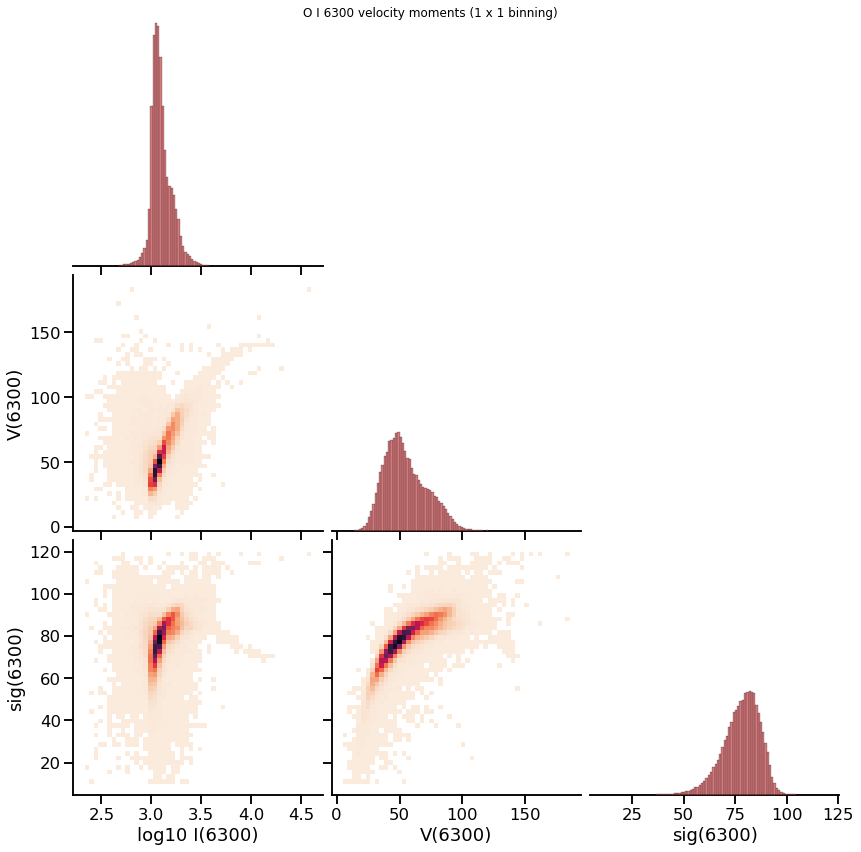

In [17]:
plot_pars_6300 = dict(
    ilabel="O I",
    label="6300",
    flabel="ngc346-PZ-oi",
    **mom_pars_6300,
)
g = moments.moments_corner_plot(mom6300, rebin=1, **plot_pars_6300)

/Users/will/miniconda3/envs/py39/lib/python3.9/site-packages/whispy/moments.py:127: RuntimeWarning: invalid value encountered in log10
  f"log10 I({label})": np.log10(irange),


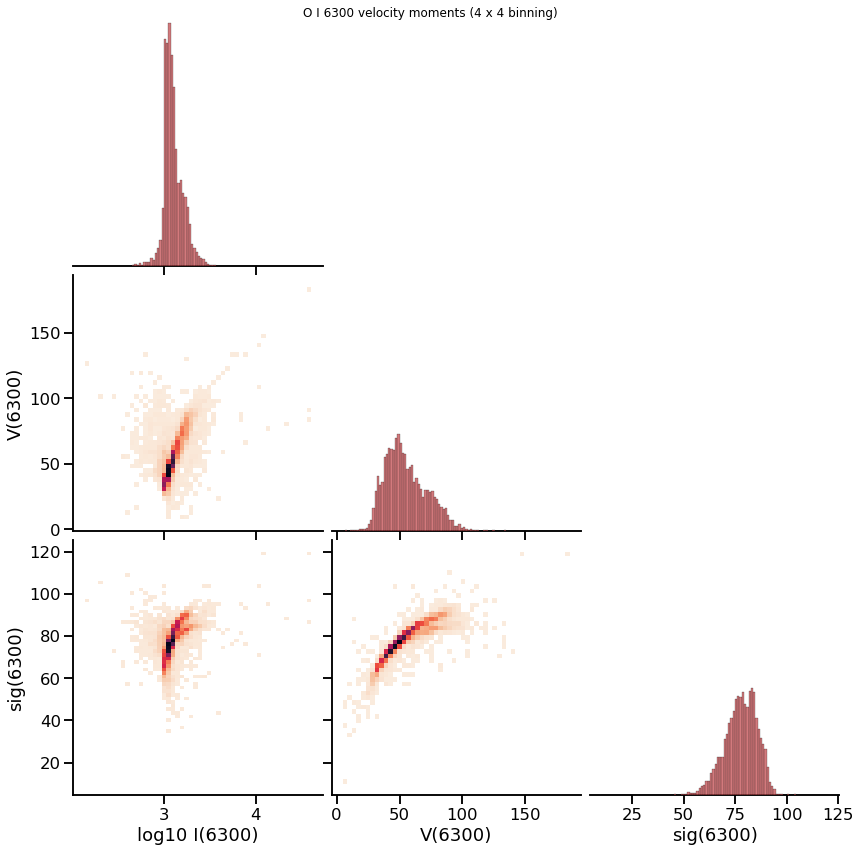

In [18]:
plot_pars_6300 = dict(
    ilabel="O I",
    label="6300",
    flabel="ngc346-PZ-oi",
    **mom_pars_6300,
)
g = moments.moments_corner_plot(mom6300, rebin=4, **plot_pars_6300)

This looks like we clearly have UNDERsubtraction of the sky.

That is the simpplest explanmation for the velocity bending towards the blue at low intensity.

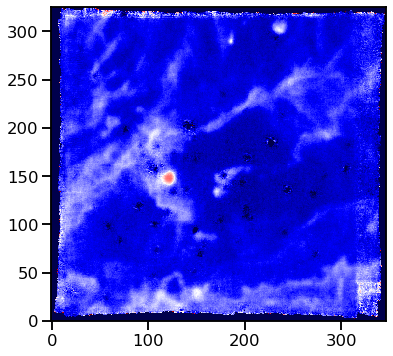

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))

(3e5 * (mom6300[1] / 6300.30 - 1.0)).rebin(1).plot(
    vmin=0,
    vmax=220,
    cmap="seismic",
    ax=ax,
)

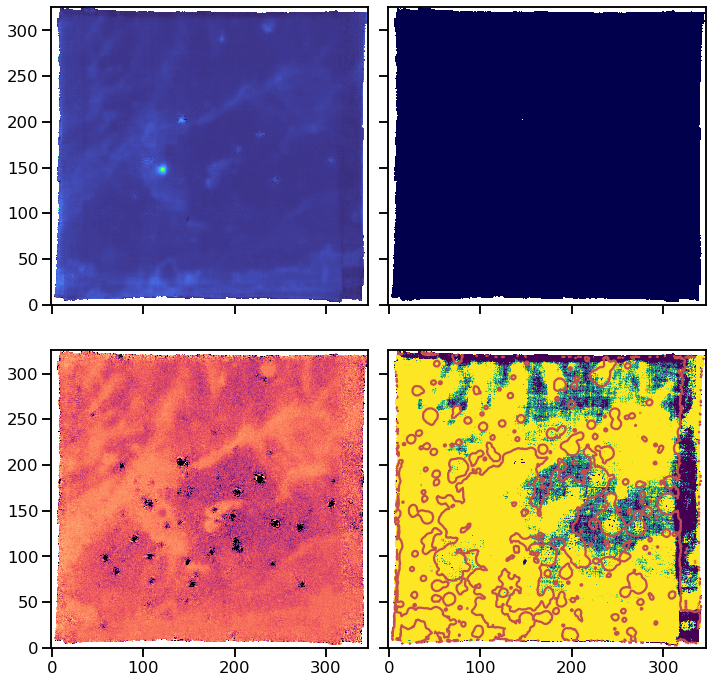

In [20]:
fig, axes = plt.subplots(
    2,
    2,
    figsize=(10, 10),
    sharex=True,
    sharey=True,
)

imap = mom6300[0].copy()
vmap = 3e5 * (mom6300[1] / 6300.30 - 1.0)
smap = 3e5 * (mom6300[2] / 6300.30)

m = imap.data > 10.0

vmap.mask = vmap.mask | (~m)
smap.mask = smap.mask | (~m)

imap.rebin(1).plot(
    vmin=-500,
    vmax=3e4,
    cmap="turbo",
    ax=axes[0, 0],
)

vmap.rebin(1).plot(
    vmin=1000,
    vmax=1100,
    cmap="seismic",
    ax=axes[0, 1],
)

smap.rebin(1).plot(
    vmin=0,
    vmax=120,
    cmap="magma",
    ax=axes[1, 0],
)

imap.rebin(1).plot(
    vmin=960,
    vmax=1100,
    cmap="viridis",
    ax=axes[1, 1],
)
bg_6300 = contcube.select_lambda(w1, w2).mean(axis=0)
axes[1, 1].contour(
    bg_6300.data,
    levels=[300],
    colors="r",
)

fig.tight_layout()

In [21]:
msky = (imap.data < 990) & (imap.data > 940) & (bg_6300.data < 300)
msky[310:, :] = False
msky[:, 310:] = False
msky[:10, :] = False
msky[:, :10] = False

In [22]:
msky.sum(), np.where(msky)

(2222,
 (array([ 76,  76,  78, ..., 309, 309, 309]),
  array([167, 181, 180, ..., 302, 303, 307])))

In [23]:
core_6300 = csubcube.select_lambda(6295, 6310)
sky_6300 = core_6300.copy()
sky_6300.mask = sky_6300.mask | ~msky[None, ::]

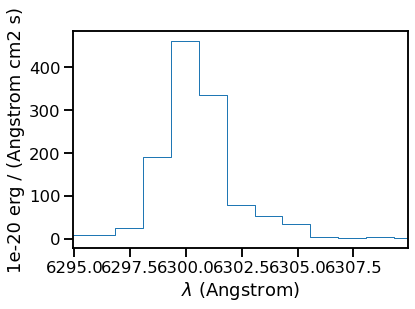

In [24]:
sky_6300.mean(axis=(1, 2)).plot()

In [25]:
corr_6300 = core_6300 - sky_6300.mean(axis=(1, 2))

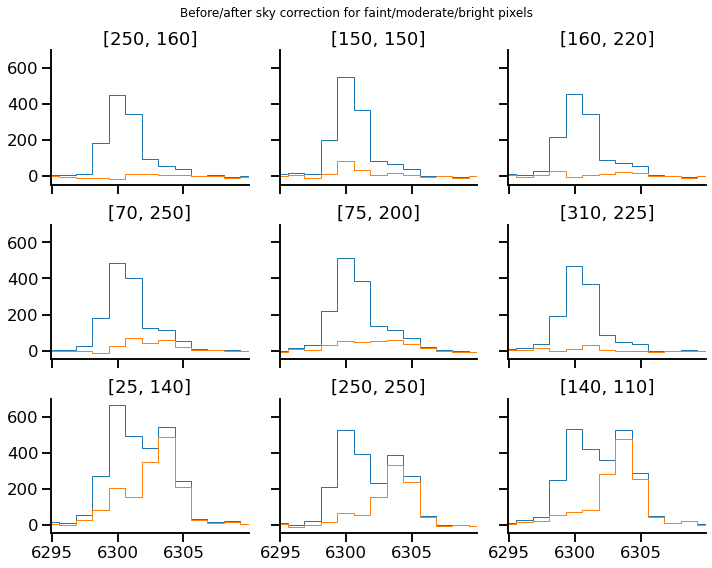

In [26]:
testpixels = [
    [250, 160],
    [150, 150],
    [160, 220],
    [70, 250],
    [75, 200],
    [310, 225],
    [25, 140],
    [250, 250],
    [140, 110],  # [180, 290],
]
fig, axes = plt.subplots(
    3,
    3,
    figsize=(10, 8),
    sharex=True,
    sharey=True,
)
for (j, i), ax in zip(testpixels, axes.flat):
    core_6300[:, j, i].plot(ax=ax)
    corr_6300[:, j, i].plot(ax=ax)
    ax.set(xlabel="", ylabel="")
    ax.set_title(f"[{j}, {i}]")
fig.suptitle("Before/after sky correction for faint/moderate/bright pixels")
sns.despine()
fig.tight_layout()

In [27]:
mom6300c = moments.find_moments(corr_6300.select_lambda(6300, 6308))

/Users/will/miniconda3/envs/py39/lib/python3.9/site-packages/whispy/moments.py:43: RuntimeWarning: invalid value encountered in sqrt
  mom2.data = np.sqrt(mom2.data)


/Users/will/miniconda3/envs/py39/lib/python3.9/site-packages/whispy/moments.py:119: RuntimeWarning: invalid value encountered in log10
  f"log10 I({label})": np.log10(mom0.data[~m]),
/Users/will/miniconda3/envs/py39/lib/python3.9/site-packages/whispy/moments.py:127: RuntimeWarning: invalid value encountered in log10
  f"log10 I({label})": np.log10(irange),


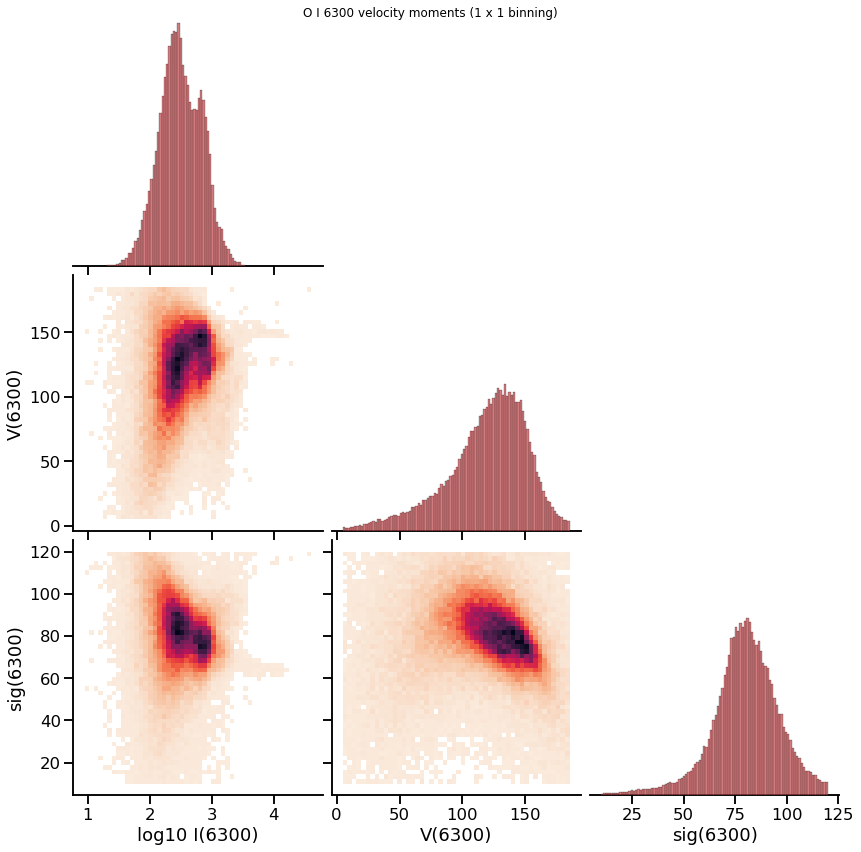

In [28]:
g = moments.moments_corner_plot(mom6300c, rebin=1, **plot_pars_6300)

/Users/will/miniconda3/envs/py39/lib/python3.9/site-packages/whispy/moments.py:119: RuntimeWarning: invalid value encountered in log10
  f"log10 I({label})": np.log10(mom0.data[~m]),
/Users/will/miniconda3/envs/py39/lib/python3.9/site-packages/whispy/moments.py:127: RuntimeWarning: invalid value encountered in log10
  f"log10 I({label})": np.log10(irange),


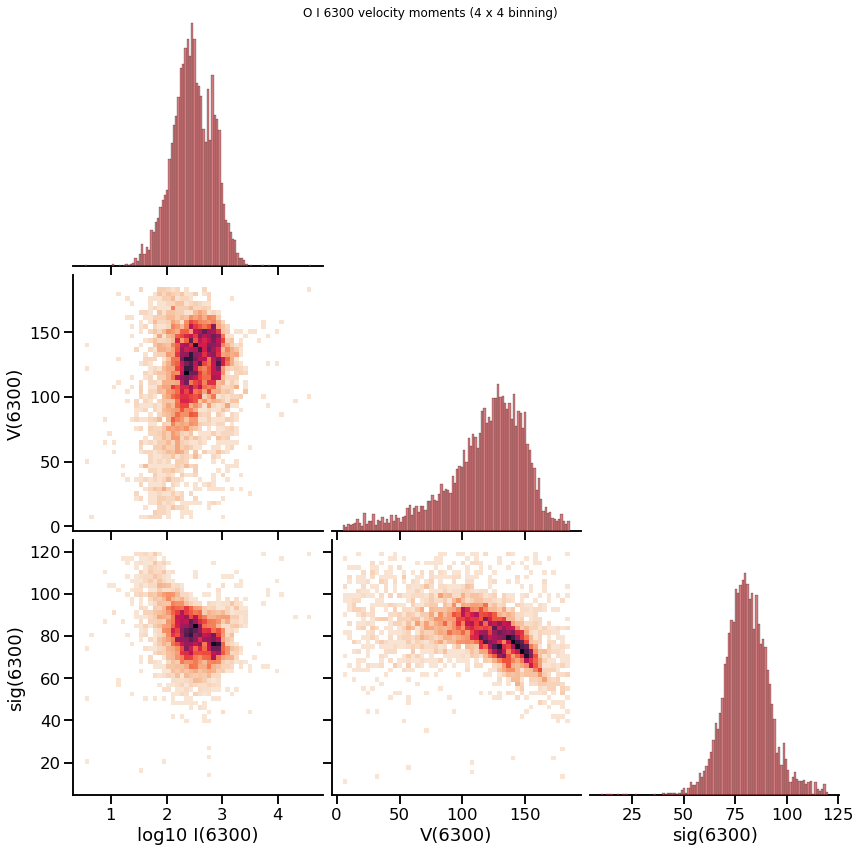

In [29]:
g = moments.moments_corner_plot(mom6300c, rebin=4, **plot_pars_6300)

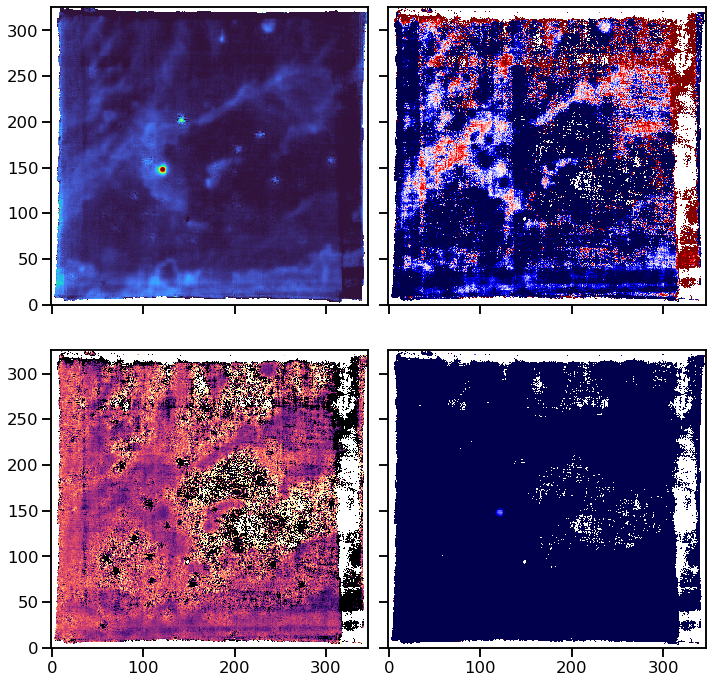

In [30]:
fig, axes = plt.subplots(
    2,
    2,
    figsize=(10, 10),
    sharex=True,
    sharey=True,
)

imap = mom6300c[0].copy()
vmap = 3e5 * (mom6300c[1] / 6300.30 - 1.0)
smap = 3e5 * (mom6300c[2] / 6300.30)

m = imap.data > 0.0

vmap.mask = vmap.mask | (~m)
smap.mask = smap.mask | (~m)

vmap_old = 3e5 * (mom6300[1] / 6300.30 - 1.0)
vmap_old.mask = vmap_old.mask | (~m)


imap.rebin(1).plot(
    vmin=0,
    vmax=1e4,
    cmap="turbo",
    ax=axes[0, 0],
)

vmap.rebin(1).plot(
    vmin=120,
    vmax=180,
    cmap="seismic",
    ax=axes[0, 1],
)

smap.rebin(1).plot(
    vmin=40,
    vmax=120,
    cmap="magma",
    ax=axes[1, 0],
)

vmap_old.rebin(1).plot(
    vmin=120,
    vmax=180,
    cmap="seismic",
    ax=axes[1, 1],
)


fig.tight_layout()

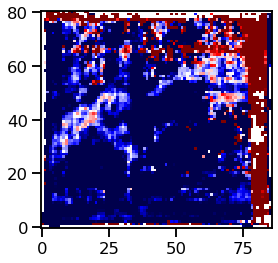

In [31]:
vmap.rebin(4).plot(
    vmin=130,
    vmax=180,
    cmap="seismic",
)

There is clearly a problem still with the fainter pixels.  Witness the trend of sig with intensity.  But theis is not so important for studying the brighter parts.

In [32]:
mom_pars_6300 = dict(
    restwav=6300.30,
    irange=[-150, 4.0e4],
    vrange=[85, 255],
    srange=[30, 150],
)
moments.save_moments_to_fits(
    mom6300c,
    label="6300",
    flabel="ngc346-PZ-oi",
    **mom_pars_6300,
)

### The other [O I] line: 6363

This time around, we will just work with the co-added cube

In [33]:
core_6363 = csubcube.select_lambda(6362, 6372)
mom6363 = moments.find_moments(core_6363)

/Users/will/miniconda3/envs/py39/lib/python3.9/site-packages/whispy/moments.py:43: RuntimeWarning: invalid value encountered in sqrt
  mom2.data = np.sqrt(mom2.data)


In [34]:
mom_pars_6363 = dict(
    restwav=6363.78,
    irange=[-50, 1.3e4],
    vrange=[5, 255],
    srange=[10, 120],
)

/Users/will/miniconda3/envs/py39/lib/python3.9/site-packages/whispy/moments.py:127: RuntimeWarning: invalid value encountered in log10
  f"log10 I({label})": np.log10(irange),


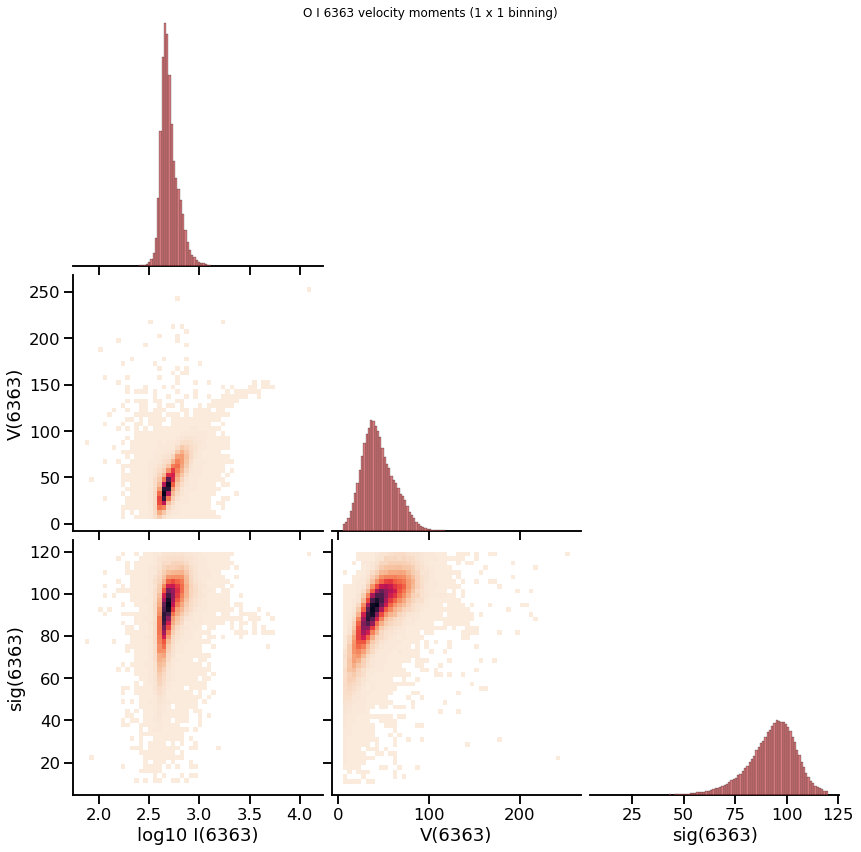

In [35]:
plot_pars_6363 = dict(
    ilabel="O I",
    label="6363",
    flabel="ngc346-PZ-oi",
    **mom_pars_6363,
)
g = moments.moments_corner_plot(
    mom6363,
    rebin=1,
    **plot_pars_6363,
)

/Users/will/miniconda3/envs/py39/lib/python3.9/site-packages/whispy/moments.py:127: RuntimeWarning: invalid value encountered in log10
  f"log10 I({label})": np.log10(irange),


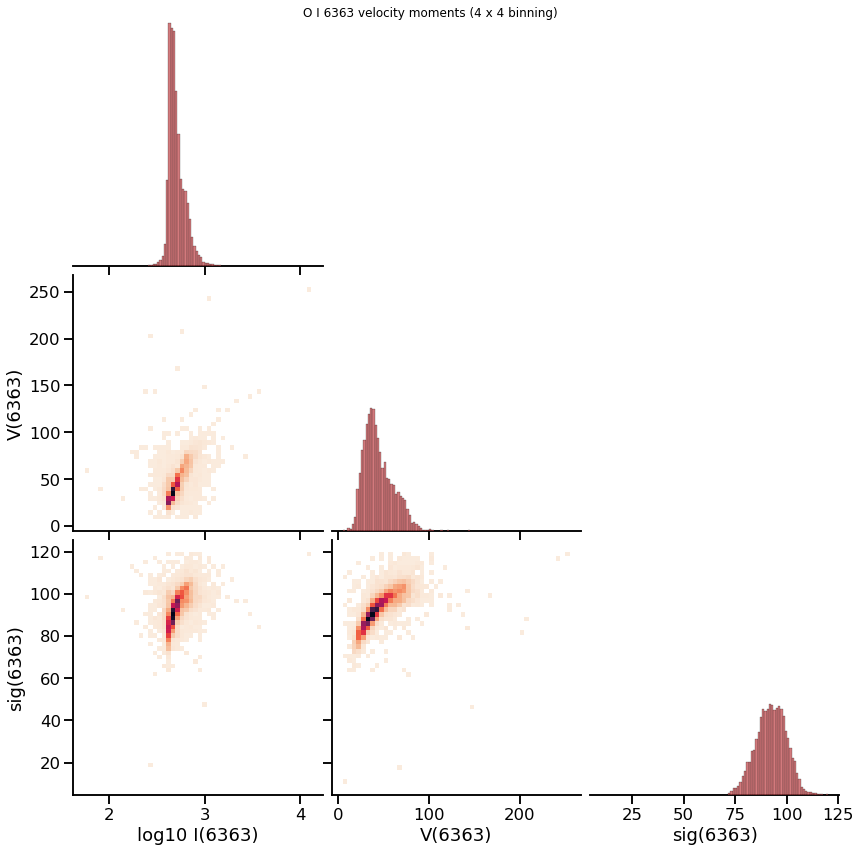

In [36]:
g = moments.moments_corner_plot(
    mom6363,
    rebin=4,
    **plot_pars_6363,
)

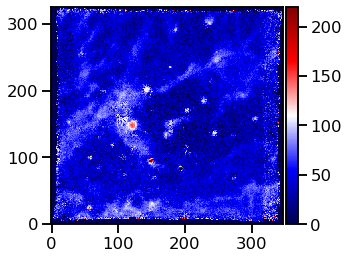

In [37]:
(3e5 * (mom6363[1] / 6363.78 - 1.0)).rebin(1).plot(
    vmin=0,
    vmax=220,
    cmap="seismic",
    colorbar="v",
)

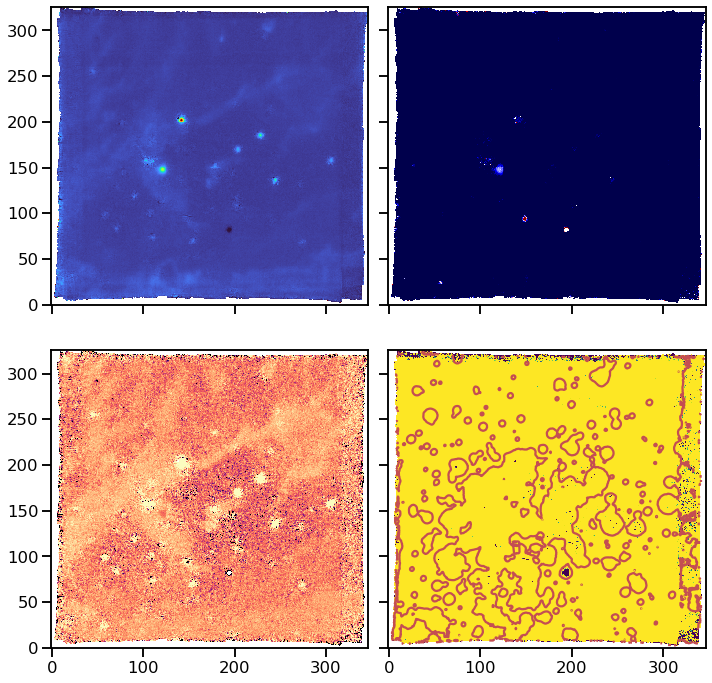

In [38]:
fig, axes = plt.subplots(
    2,
    2,
    figsize=(10, 10),
    sharex=True,
    sharey=True,
)

imap = mom6363[0].copy()
vmap = 3e5 * (mom6363[1] / 6363.78 - 1.0)
smap = 3e5 * (mom6363[2] / 6363.78)

m = imap.data > 10.0

vmap.mask = vmap.mask | (~m)
smap.mask = smap.mask | (~m)

imap.rebin(1).plot(
    vmin=-500 / 3,
    vmax=3e4 / 3,
    cmap="turbo",
    ax=axes[0, 0],
)

vmap.rebin(1).plot(
    vmin=100,
    vmax=220,
    cmap="seismic",
    ax=axes[0, 1],
)

smap.rebin(1).plot(
    vmin=0,
    vmax=120,
    cmap="magma",
    ax=axes[1, 0],
)

imap.rebin(1).plot(
    vmin=320,
    vmax=350,
    cmap="viridis",
    ax=axes[1, 1],
)
bg_6363 = contcube.select_lambda(6362, 6372).mean(axis=0)
axes[1, 1].contour(
    bg_6363.data,
    levels=[300],
    colors="r",
)

fig.tight_layout()

Use the same mask as we used for 6300


In [39]:
sky_6363 = core_6363.copy()
sky_6363.mask = sky_6363.mask | ~msky[None, ::]

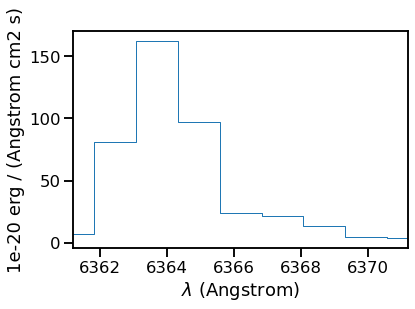

In [40]:
sky_6363.mean(axis=(1, 2)).plot()

In [41]:
corr_6363 = core_6363 - sky_6363.mean(axis=(1, 2))

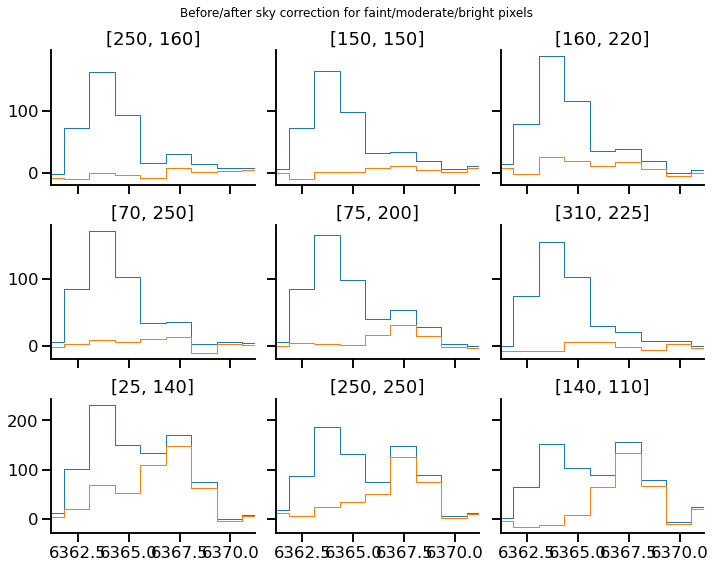

In [42]:
testpixels = [
    [250, 160],
    [150, 150],
    [160, 220],
    [70, 250],
    [75, 200],
    [310, 225],
    [25, 140],
    [250, 250],
    [140, 110],  # [180, 290],
]
fig, axes = plt.subplots(
    3,
    3,
    figsize=(10, 8),
    sharex=True,
    sharey="row",
)
for (j, i), ax in zip(testpixels, axes.flat):
    core_6363[:, j, i].plot(ax=ax)
    corr_6363[:, j, i].plot(ax=ax)
    ax.set(xlabel="", ylabel="")
    ax.set_title(f"[{j}, {i}]")
fig.suptitle("Before/after sky correction for faint/moderate/bright pixels")
sns.despine()
fig.tight_layout()

In [43]:
mom6363c = moments.find_moments(corr_6363)

/Users/will/miniconda3/envs/py39/lib/python3.9/site-packages/whispy/moments.py:43: RuntimeWarning: invalid value encountered in sqrt
  mom2.data = np.sqrt(mom2.data)


/Users/will/miniconda3/envs/py39/lib/python3.9/site-packages/whispy/moments.py:119: RuntimeWarning: invalid value encountered in log10
  f"log10 I({label})": np.log10(mom0.data[~m]),
/Users/will/miniconda3/envs/py39/lib/python3.9/site-packages/whispy/moments.py:127: RuntimeWarning: invalid value encountered in log10
  f"log10 I({label})": np.log10(irange),


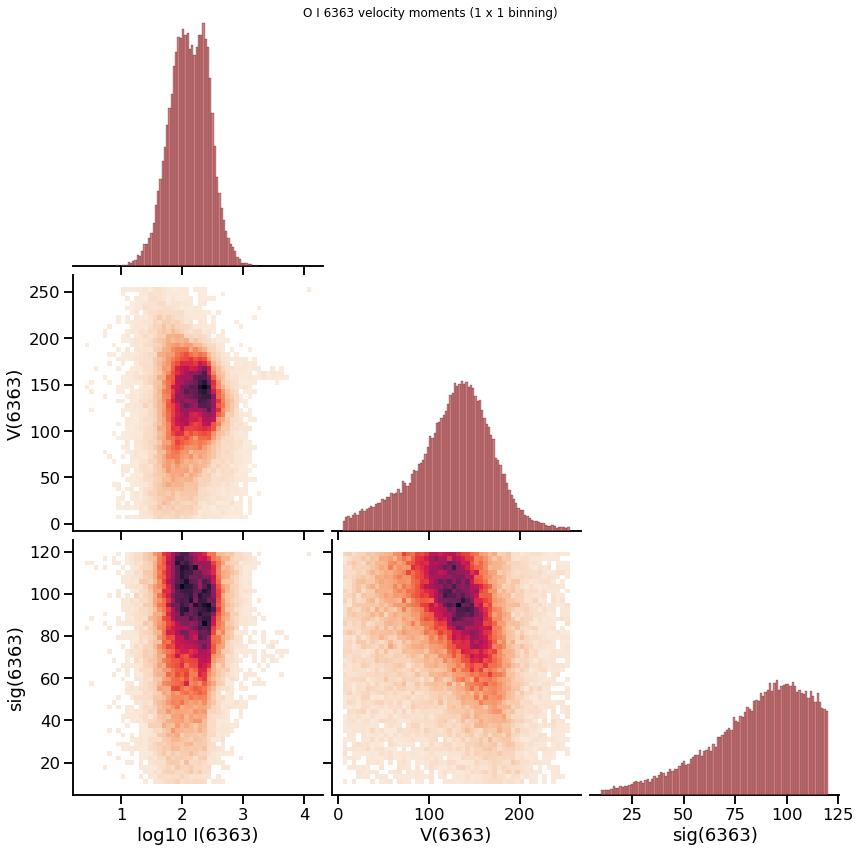

In [44]:
g = moments.moments_corner_plot(mom6363c, rebin=1, **plot_pars_6363)

/Users/will/miniconda3/envs/py39/lib/python3.9/site-packages/whispy/moments.py:119: RuntimeWarning: invalid value encountered in log10
  f"log10 I({label})": np.log10(mom0.data[~m]),
/Users/will/miniconda3/envs/py39/lib/python3.9/site-packages/whispy/moments.py:127: RuntimeWarning: invalid value encountered in log10
  f"log10 I({label})": np.log10(irange),


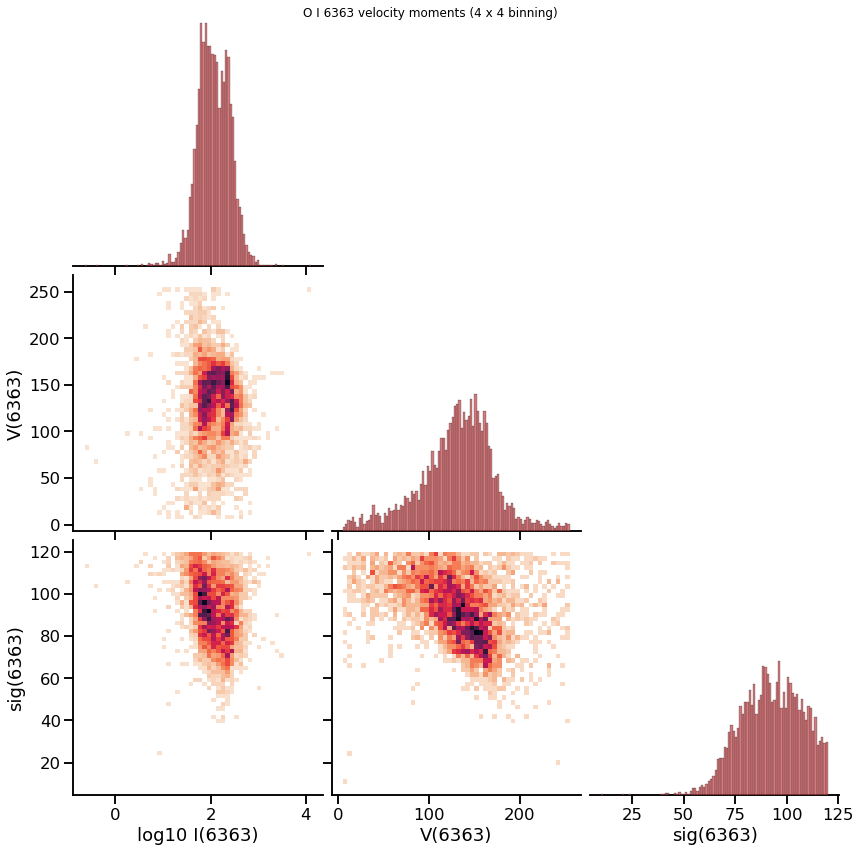

In [45]:
g = moments.moments_corner_plot(mom6363c, rebin=4, **plot_pars_6363)

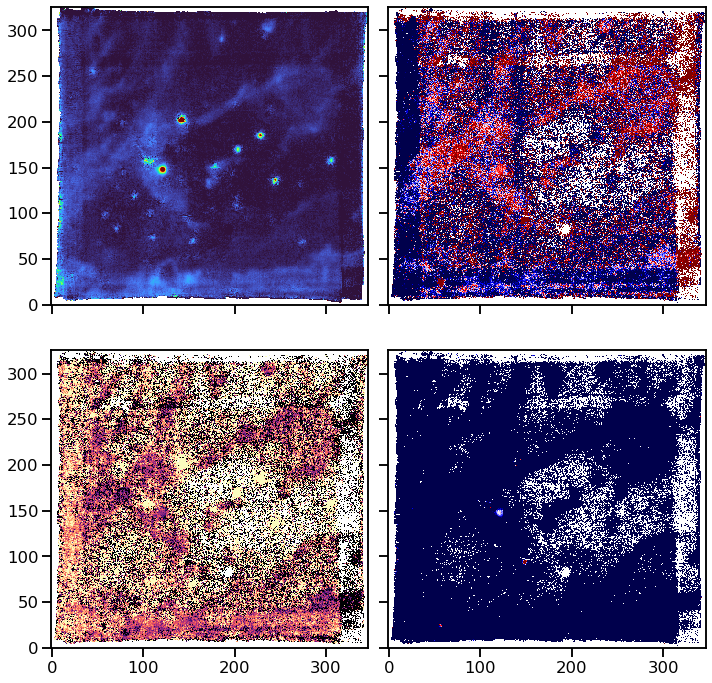

In [46]:
fig, axes = plt.subplots(
    2,
    2,
    figsize=(10, 10),
    sharex=True,
    sharey=True,
)

imap = mom6363c[0].copy()
vmap = 3e5 * (mom6363c[1] / 6363.78 - 1.0)
smap = 3e5 * (mom6363c[2] / 6363.78)

m = imap.data > 0.0

vmap.mask = vmap.mask | (~m)
smap.mask = smap.mask | (~m)

vmap_old = 3e5 * (mom6363[1] / 6363.78 - 1.0)
vmap_old.mask = vmap_old.mask | (~m)


imap.rebin(1).plot(
    vmin=0,
    vmax=1e4 / 3,
    cmap="turbo",
    ax=axes[0, 0],
)

vmap.rebin(1).plot(
    vmin=120,
    vmax=180,
    cmap="seismic",
    ax=axes[0, 1],
)

smap.rebin(1).plot(
    vmin=40,
    vmax=120,
    cmap="magma",
    ax=axes[1, 0],
)

vmap_old.rebin(1).plot(
    vmin=120,
    vmax=180,
    cmap="seismic",
    ax=axes[1, 1],
)


fig.tight_layout()

In [47]:
mom_pars_6363 = dict(
    restwav=6363.78,
    irange=[-150, 1.3e4],
    vrange=[85, 255],
    srange=[30, 150],
)
moments.save_moments_to_fits(
    mom6363c,
    label="6363",
    flabel="ngc346-PZ-oi",
    **mom_pars_6363,
)

## Other lines in the wav range: [S III] and Si II

In [48]:
core_6312 = (oi6300cube - contcube).select_lambda(6311, 6321)
mom6312 = moments.find_moments(core_6312)

/Users/will/miniconda3/envs/py39/lib/python3.9/site-packages/whispy/moments.py:43: RuntimeWarning: invalid value encountered in sqrt
  mom2.data = np.sqrt(mom2.data)


In [49]:
mom_pars_6312 = dict(
    restwav=6312.06,
    irange=[-150, 4e4],
    vrange=[85, 255],
    srange=[20, 120],
)

/Users/will/miniconda3/envs/py39/lib/python3.9/site-packages/whispy/moments.py:127: RuntimeWarning: invalid value encountered in log10
  f"log10 I({label})": np.log10(irange),


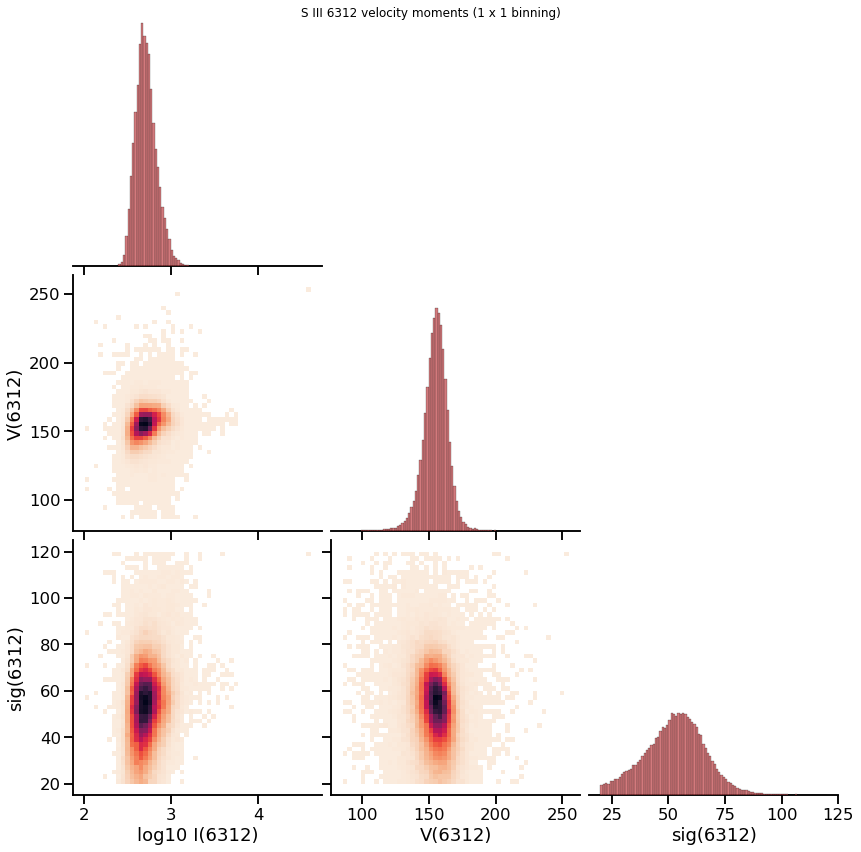

In [50]:
plot_pars_6312 = dict(
    ilabel="S III",
    label="6312",
    flabel="ngc346-PZ-siii",
    **mom_pars_6312,
)
g = moments.moments_corner_plot(
    mom6312,
    rebin=1,
    **plot_pars_6312,
)

/Users/will/miniconda3/envs/py39/lib/python3.9/site-packages/whispy/moments.py:127: RuntimeWarning: invalid value encountered in log10
  f"log10 I({label})": np.log10(irange),


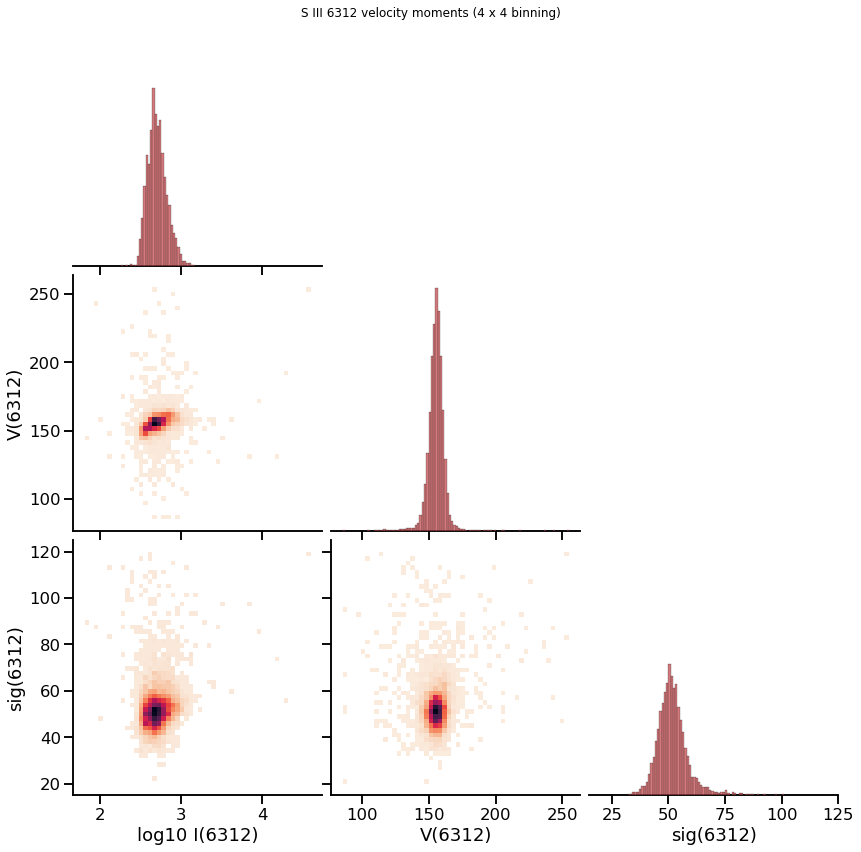

In [51]:
g = moments.moments_corner_plot(
    mom6312,
    rebin=4,
    **plot_pars_6312,
)

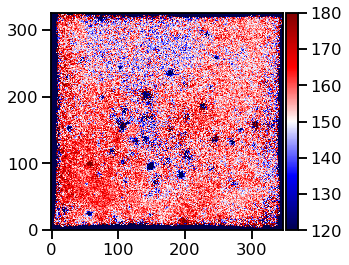

In [52]:
(3e5 * (mom6312[1] / 6312.06 - 1.0)).rebin(1).plot(
    vmin=120,
    vmax=180,
    cmap="seismic",
    colorbar="v",
)

In [53]:
moments.save_moments_to_fits(
    mom6312,
    label="6312",
    flabel="ngc346-PZ-siii",
    **mom_pars_6312,
)

In [54]:
cont_6312 = contcube.select_lambda(6311, 6321).mean(axis=0)

In [55]:
cont_6312.write("../../data/ngc346-PZ-cont-6312-mean.fits")